In [1]:
import pandas as pd

In [2]:
pip install -r requirements.txt

  Using cached pandas-2.0.0-cp310-cp310-win_amd64.whl (11.2 MB)
  Using cached numpy-1.24.2-cp310-cp310-win_amd64.whl (14.8 MB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached contourpy-1.0.7-cp310-cp310-win_amd64.whl (162 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached Pillow-9.5.0-cp310-cp310-win_amd64.whl (2.5 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
df_orders = pd.read_csv('data_orders.csv')

In [80]:
df_orders.shape

(10716, 8)

In [81]:
df_orders.sample(n=10, random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
10309,00:29:14,-0.966062,51.454821,NaN,3000555146103,4,0,44.0
6705,01:28:45,-0.970472,51.456725,NaN,3000595870644,4,0,121.0
304,08:22:36,-0.916708,51.439852,NaN,3000627783633,9,0,NaN
9143,07:32:27,-0.955580,51.453493,1078.0,3000622140805,4,1,1017.0
10593,04:39:55,-0.946358,51.439779,NaN,3000554645524,4,0,121.0
8654,08:05:02,-0.967327,51.449395,598.0,3000592772077,4,1,48.0
3919,00:21:47,-0.971597,51.457574,NaN,3000624492441,4,0,180.0
4337,20:26:40,-0.971296,51.458115,NaN,3000628755869,4,0,104.0
6931,07:25:39,-0.942301,51.474812,NaN,3000628430595,4,0,44.0
967,13:41:31,-0.952194,51.444067,NaN,3000623591189,9,0,NaN


In [82]:
df_offers = pd.read_csv('data_offers.csv')

In [83]:
df_offers.shape

(334363, 2)

In [84]:
df_offers.sample(n=10, random_state=42)

,order_gk,offer_id
244971,3000627481054,300052086404
236783,3000631282042,300052342376
22714,3000624367715,300051909011
306983,3000557436646,300050769980
170256,3000588131807,300051201442
316173,3000629756224,300052250019
234398,3000625018320,300051967737
122107,3000629082264,300052196687
60909,3000588606991,300051225443
52998,3000629981908,300052274857


In [85]:
df_all = df_orders.merge(right=df_offers, how="inner", on="order_gk") 

In [86]:
df_all.sample(n=10)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
20493,00:25:45,-0.956332,51.459660,418.0,3000628205986,4,1,841.0,300052133163
24620,08:17:02,-0.967002,51.453412,NaN,3000589082987,4,0,92.0,300051249061
6015,21:39:11,-0.955922,51.442384,NaN,3000595721441,9,0,NaN,300051544259
8543,00:25:23,-0.960425,51.444078,358.0,3000588856075,4,1,46.0,300051243163
30582,13:08:38,-0.945927,51.441377,NaN,3000588556853,4,0,54.0,300051222577
3058,15:12:28,-0.957340,51.456278,NaN,3000623617169,4,0,102.0,300051856289
13896,17:18:18,-0.946802,51.441930,596.0,3000554947385,4,1,57.0,300050694286
2992,22:25:32,-0.969813,51.448356,NaN,3000623816060,9,0,NaN,300051872276
26905,21:48:04,-0.981438,51.454024,NaN,3000622491528,4,0,145.0,300051775798
15647,21:23:13,-0.975596,51.455390,NaN,3000583790809,4,0,57.0,300051029978


In [87]:
import numpy as np

In [88]:
df_all["is_driver_assigned"] = np.where(df_all["is_driver_assigned_key"] == 1, "Yes", "No")

In [92]:
df_all["order_status"] = np.where(df_all["order_status_key"] == 4, "Client Cancelled", "System Reject")

In [93]:
df_all.drop(columns=["is_driver_assigned_key", "order_status_key"], inplace=True)

In [96]:
df_all = df_all.rename(columns={"order_datetime": "order_time"})

In [97]:
df_all.sample(n=3)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
12269,22:56:48,-0.949443,51.451003,NaN,3000624467324,NaN,300051916686,No,System Reject
15392,23:18:29,-0.944711,51.429670,NaN,3000598788458,82.0,300051635779,No,Client Cancelled
4497,17:57:25,-0.987042,51.470664,NaN,3000627382070,NaN,300052078194,No,System Reject


In [98]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31268 entries, 0 to 31267
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_time                     31268 non-null  object 
 1   origin_longitude               31268 non-null  float64
 2   origin_latitude                31268 non-null  float64
 3   m_order_eta                    8364 non-null   float64
 4   order_gk                       31268 non-null  int64  
 5   cancellations_time_in_seconds  21795 non-null  float64
 6   offer_id                       31268 non-null  int64  
 7   is_driver_assigned             31268 non-null  object 
 8   order_status                   31268 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 2.1+ MB


In [47]:
df_all.duplicated().sum()

0

#### Question 1 : Build up a distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

In [99]:
df_all.groupby(by=["is_driver_assigned", "order_status"])["order_gk"].count()

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
Name: order_gk, dtype: int64

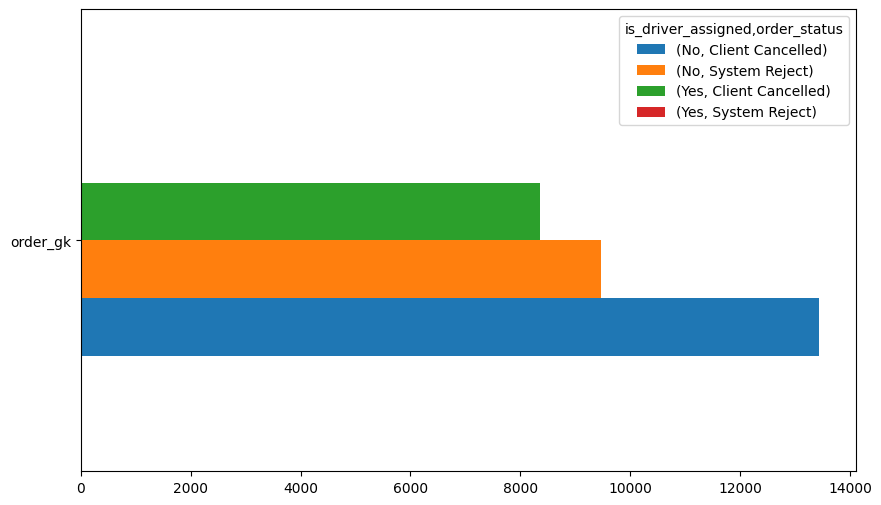

In [117]:
df_all_q1 = df_all.pivot_table(columns=["is_driver_assigned", "order_status"], values="order_gk", aggfunc="count")
df_all_q1_barchart = df_all_q1.plot(kind="barh", subplots=False, figsize=(10, 6), legend=True, rot=0)

In [102]:
df_all_q1

is_driver_assigned               No                            Yes   
order_status       Client Cancelled System Reject Client Cancelled   
order_gk                      13435          9469             8360  \

is_driver_assigned                
order_status       System Reject  
order_gk                       4

#### Question 2: Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

In [120]:
df_all["order_hour"] = df_all["order_time"].str.split(":").apply(lambda split: split[0])

In [121]:
df_all["order_minutes"] = df_all["order_time"].str.split(":").apply(lambda split: split[1])

In [124]:
df_all.sample(n=5, random_state=42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hour,order_minutes
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Yes,Client Cancelled,21,15
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,No,Client Cancelled,10,13
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,No,Client Cancelled,09,16
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,No,Client Cancelled,02,08
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,No,Client Cancelled,21,44


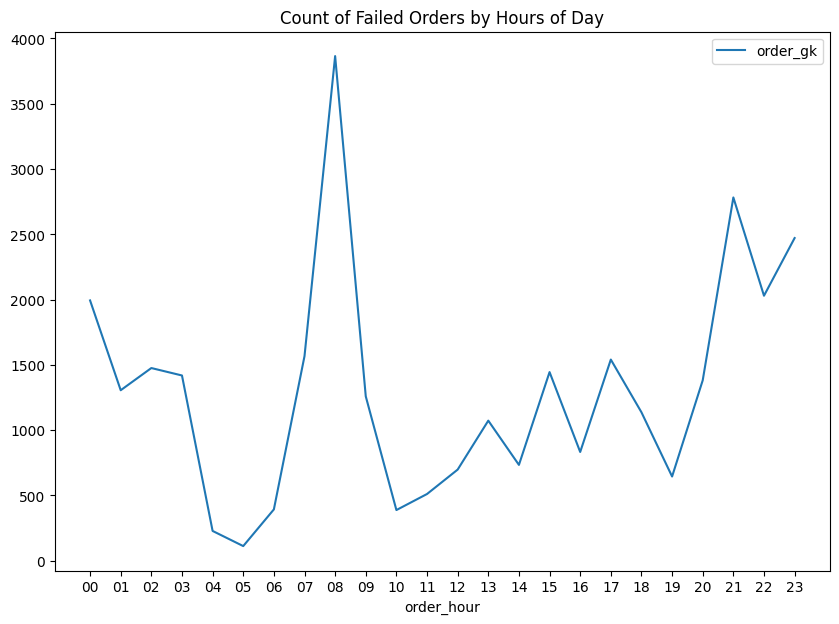

In [135]:
df_all_q2 = df_all.groupby(by='order_hour')['order_gk'].count().plot(figsize=(10,7), 
                                                                     legend=True, 
                                                                     xticks=range(0,24),
                                                                     title="Count of Failed Orders by Hours of Day"
                                                                     )

##### As a first step towards a DataFrame that contains such aggregated information we group-by by the order hour, the driver-assigned flag, and the order status, and then count the number of order_gk.

In [136]:
grouped_q2 = df_all.groupby(by=["order_hour", "is_driver_assigned", "order_status"])["order_gk"].count()

In [139]:
grouped_q2.reset_index()

,order_hour,is_driver_assigned,order_status,order_gk
0,00,No,Client Cancelled,957
1,00,No,System Reject,706
2,00,Yes,Client Cancelled,326
3,00,Yes,System Reject,4
4,01,No,Client Cancelled,633
...,...,...,...,...
68,22,No,System Reject,660
69,22,Yes,Client Cancelled,415
70,23,No,Client Cancelled,1144
71,23,No,System Reject,883


##### The group-by operation results in the correct information. However, Pandas puts the group-by columns as indices in the resulting DataFrame. To manipulate it easier, we can call the reset_index to have the index columns as regular, data columns, and create a new, incrementing integer as an index.
##### We will create a multi-line plot, with the order hour on the horizontal axis, and multiple lines that count the number of orders per hour and per fail category. Then, we pivot the table around the order hour column, so that it can be plotted on the x-axis. We specify the driver-assigned flag and the order status as columns attributes so that there is one line per combination of values, and then present the order_gk column as the values argument.
##### Moreover, we decorate the plot with a custom figure size, a title, and a xticks parameter.
##### Note that here we call the pivot method and not pivot_table as in the previous question.

In [141]:
df_all_q2b = grouped_q2.reset_index().pivot(index="order_hour",
                                   columns=["is_driver_assigned", "order_status"],
                                   values="order_gk")

In [142]:
df_all_q2b

is_driver_assigned               No                            Yes   
order_status       Client Cancelled System Reject Client Cancelled   
order_hour                                                           
00                            957.0         706.0            326.0  \
01                            633.0         374.0            298.0   
02                            586.0         649.0            240.0   
03                            565.0         658.0            195.0   
04                             90.0          45.0             92.0   
05                             31.0          33.0             47.0   
06                            169.0         109.0            114.0   
07                            523.0         526.0            517.0   
08                           1447.0        1338.0           1080.0   
09                            470.0         294.0            494.0   
10                            122.0          37.0            228.0   
11                            155.0          65.0            290.0   
12                            321.0          91.0            285.0   
13                            436.0         294.0            342.0   
14                            311.0         125.0            297.0   
15                            610.0         335.0            499.0   
16                            381.0         112.0            339.0   
17                            756.0         319.0            465.0   
18                            447.0         314.0            375.0   
19                            242.0          95.0            307.0   
20                            664.0         371.0            346.0   
21                           1421.0        1036.0            325.0   
22                            954.0         660.0            415.0   
23                           1144.0         883.0            444.0   

is_driver_assigned                
order_status       System Reject  
order_hour                        
00                           4.0  
01                           NaN  
02                           NaN  
03                           NaN  
04                           NaN  
05                           NaN  
06                           NaN  
07                           NaN  
08                           NaN  
09                           NaN  
10                           NaN  
11                           NaN  
12                           NaN  
13                           NaN  
14                           NaN  
15                           NaN  
16                           NaN  
17                           NaN  
18                           NaN  
19                           NaN  
20                           NaN  
21                           NaN  
22                           NaN  
23                           NaN

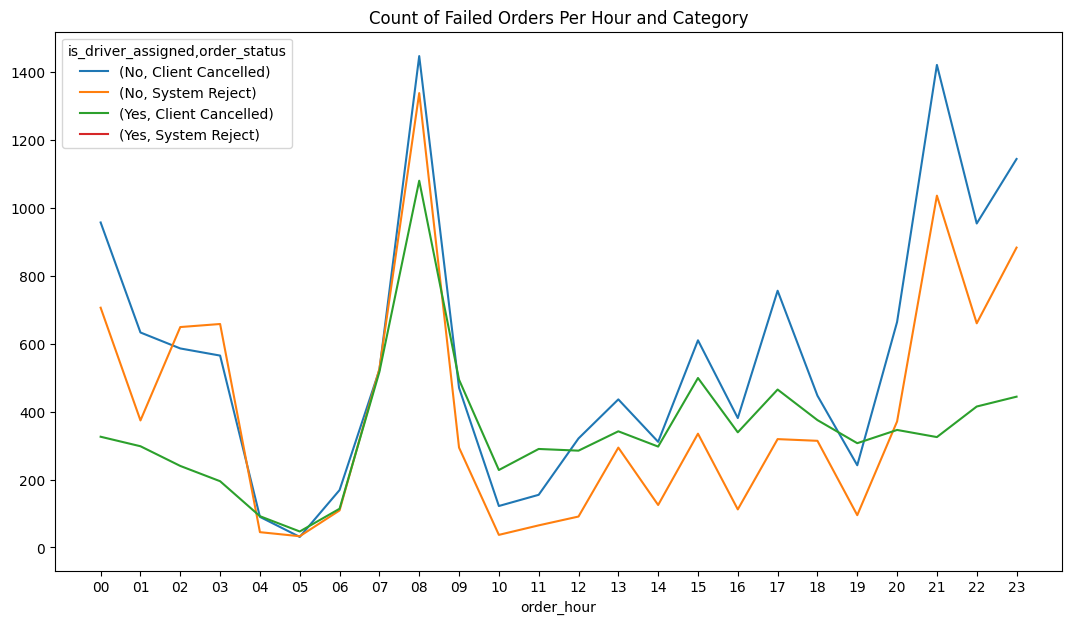

In [143]:
df_all_q2b = grouped_q2.reset_index().pivot(index="order_hour",
                                   columns=["is_driver_assigned", "order_status"],
                                   values="order_gk").plot(xticks=range(0, 24),
                                                           figsize=(13, 7),
                                                           title="Count of Failed Orders Per Hour and Category")

##### The four system rejects with the assigned driver occurred around midnight (see the output of the grouped DataFrame). The rest of the categories follow similar distribution, with the client cancellations with the assigned driver having a substantially lower count during the night hours.